In [33]:
from HARK.ConsumptionSaving.ConsPortfolioModel import PortfolioConsumerType
from HARK.utilities import plot_funcs
from time import time
from ConsWealthPortfolioModel import WealthPortfolioConsumerType, init_wealth_portfolio


## Wealth in the Utility and Portfolio Choice

### Infinite Horizon Model

In [56]:
agent = WealthPortfolioConsumerType(aXtraMax=1000)
agent.cycles = 0

In [57]:
t0 = time()
agent.solve()
t1 = time()
print(
    "Solving an infinite horizon portfolio choice problem with wealth in the utility took "
    + str(t1 - t0)
    + " seconds."
)

Solving an infinite horizon portfolio choice problem with wealth in the utility took 40.91287302970886 seconds.


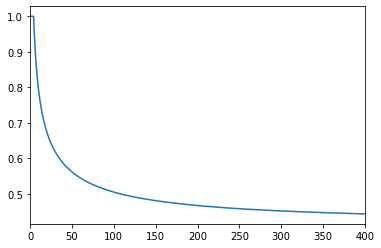

In [58]:
plot_funcs(agent.solution[0].shareFunc, 0.0, 400)

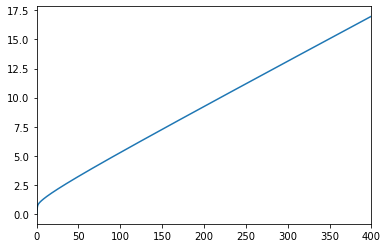

In [59]:
plot_funcs(agent.solution[0].cFunc, 0.0, 400)

### Comparison to Portfolio Consumer Type

In [60]:
portfolio_dict = init_wealth_portfolio.copy()
portfolio_dict["CRRA"] = 10
portfolio_dict["aXtraMax"] = 1000
portfolio_agent = PortfolioConsumerType(**portfolio_dict)
portfolio_agent.cycles = 0

In [61]:
t0 = time()
portfolio_agent.solve()
t1 = time()
print(
    "Solving an infinite horizon portfolio choice problem took "
    + str(t1 - t0)
    + " seconds."
)

Solving an infinite horizon portfolio choice problem took 19.37357187271118 seconds.


In [62]:
# The Merton-Samuelson share limit is computed as the limit of the portfolio share function
mert_sam_share_limit = portfolio_agent.solution[0].ShareFuncAdj.intercept_limit

PortReturnAvg = mert_sam_share_limit * portfolio_agent.RiskyAvg + (1-mert_sam_share_limit)*portfolio_agent.Rfree

In [69]:
# Check to make sure impatience condition is satisfied
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
from copy import deepcopy
IndShockConsumerTypeDict = deepcopy(portfolio_dict)
IndShockConsumerTypeDict['Rfree'] = PortReturnAvg
RfreeIsPortReturnAvg = IndShockConsumerType(**IndShockConsumerTypeDict)
RfreeIsPortReturnAvg.cycles = 0
RfreeIsPortReturnAvg.solve()

GPFRaw                 = 0.981923 
GPFNrm                 = 0.981923 
GPFAggLivPrb           = 0.962284 
Thorn = APF            = 0.991742 
PermGroFacAdj          = 1.010000 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.882000 
WRPF                   = 0.000000 
DiscFacGPFNrmMax       = 1.080114 
DiscFacGPFAggLivPrbMax = 1.102158 


### Consumption Function

In [ ]:
plot_funcs([agent.solution[0].cFunc, portfolio_agent.solution[0].cFuncAdj], 0, 200,
           legend_kwds={"labels": ["Wealth in Utility", "Portfolio Type"]})

### Share Function

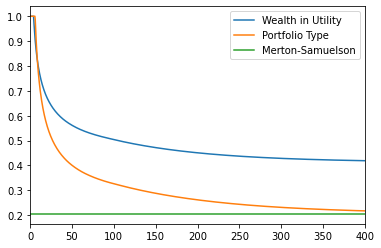

In [21]:

from HARK.interpolation import ConstantFunction
mert_sam_share_limit_func = ConstantFunction(mert_sam_share_limit)

plot_funcs([agent.solution[0].shareFunc, portfolio_agent.solution[0].ShareFuncAdj,mert_sam_share_limit_func], 0, 400,
           legend_kwds={"labels": ["Wealth in Utility", "Portfolio Type","Merton-Samuelson"]})

### Lifecycle Model with Mortality

In [22]:
import numpy as np

In [23]:
mort_data = np.loadtxt("mortality.txt")

In [24]:
LivPrb = list(mort_data[:, -1])

In [25]:
T_cycle = len(LivPrb)
params = {"LivPrb": LivPrb, "T_cycle": T_cycle, "TranShkStd": [0.01] * T_cycle,
          "PermShkStd": [0.0] * T_cycle, "PermGroFac" : [1.0] * T_cycle}

In [27]:
lc_agent = WealthPortfolioConsumerType(**params)

In [28]:
t0 = time()
lc_agent.solve()
t1 = time()
print(
    "Solving a lifecycle portfolio choice problem with wealth in the utility took "
    + str(t1 - t0)
    + " seconds."
)

Solving a lifecycle portfolio choice problem with wealth in the utility took 57.45181393623352 seconds.


In [29]:
lc_agent.cFunc = [lc_agent.solution[i].cFunc for i in range(T_cycle)]
lc_agent.shareFunc = [lc_agent.solution[i].shareFunc for i in range(T_cycle)]

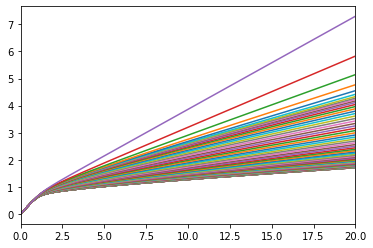

In [30]:
plot_funcs(lc_agent.cFunc, 0, 20)

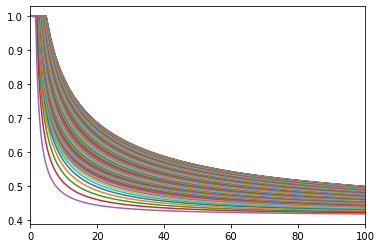

In [31]:
plot_funcs(lc_agent.shareFunc, 0, 100)